## Pre- and Post-Filetering PCA Plots

In [1]:
import scanpy as sc


In [2]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
adata

AnnData object with n_obs × n_vars = 11843 × 31053
    var: 'gene_ids', 'feature_types', 'genome'

In [4]:
sc.tl.pca(adata)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


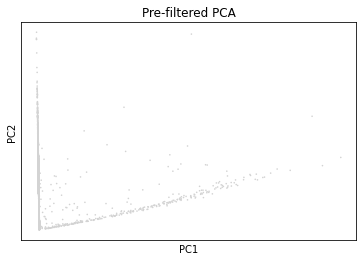

In [5]:
sc.pl.pca(adata,title='Pre-filtered PCA')

In [6]:
filtered_data = sc.pp.recipe_zheng17(adata, copy=True)

In [7]:
filtered_pca = sc.tl.pca(filtered_data, copy = True)

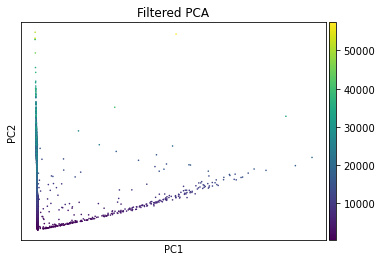

In [8]:
sc.pl.pca(filtered_data,title='Filtered PCA', color='n_counts_all')

## Neighbor clustering

In [9]:
sc.pp.neighbors(filtered_pca, n_neighbors=10, n_pcs=40)

In [10]:
sc.tl.leiden(filtered_pca)

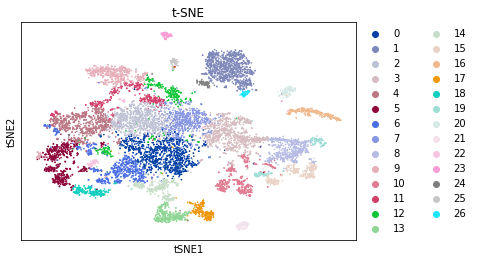

In [107]:
sc.tl.tsne(filtered_pca)
sc.pl.tsne(filtered_pca, color='leiden',use_raw=False, title='t-SNE')

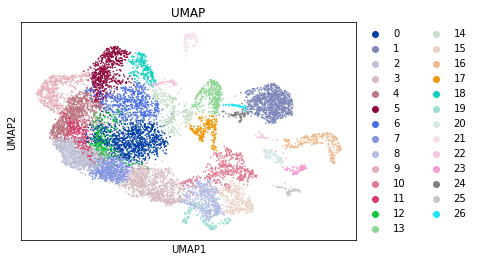

In [11]:
sc.tl.umap(filtered_pca)
sc.pl.umap(filtered_pca, color='leiden',use_raw=False, title='UMAP')

## Distinguishing Genes

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


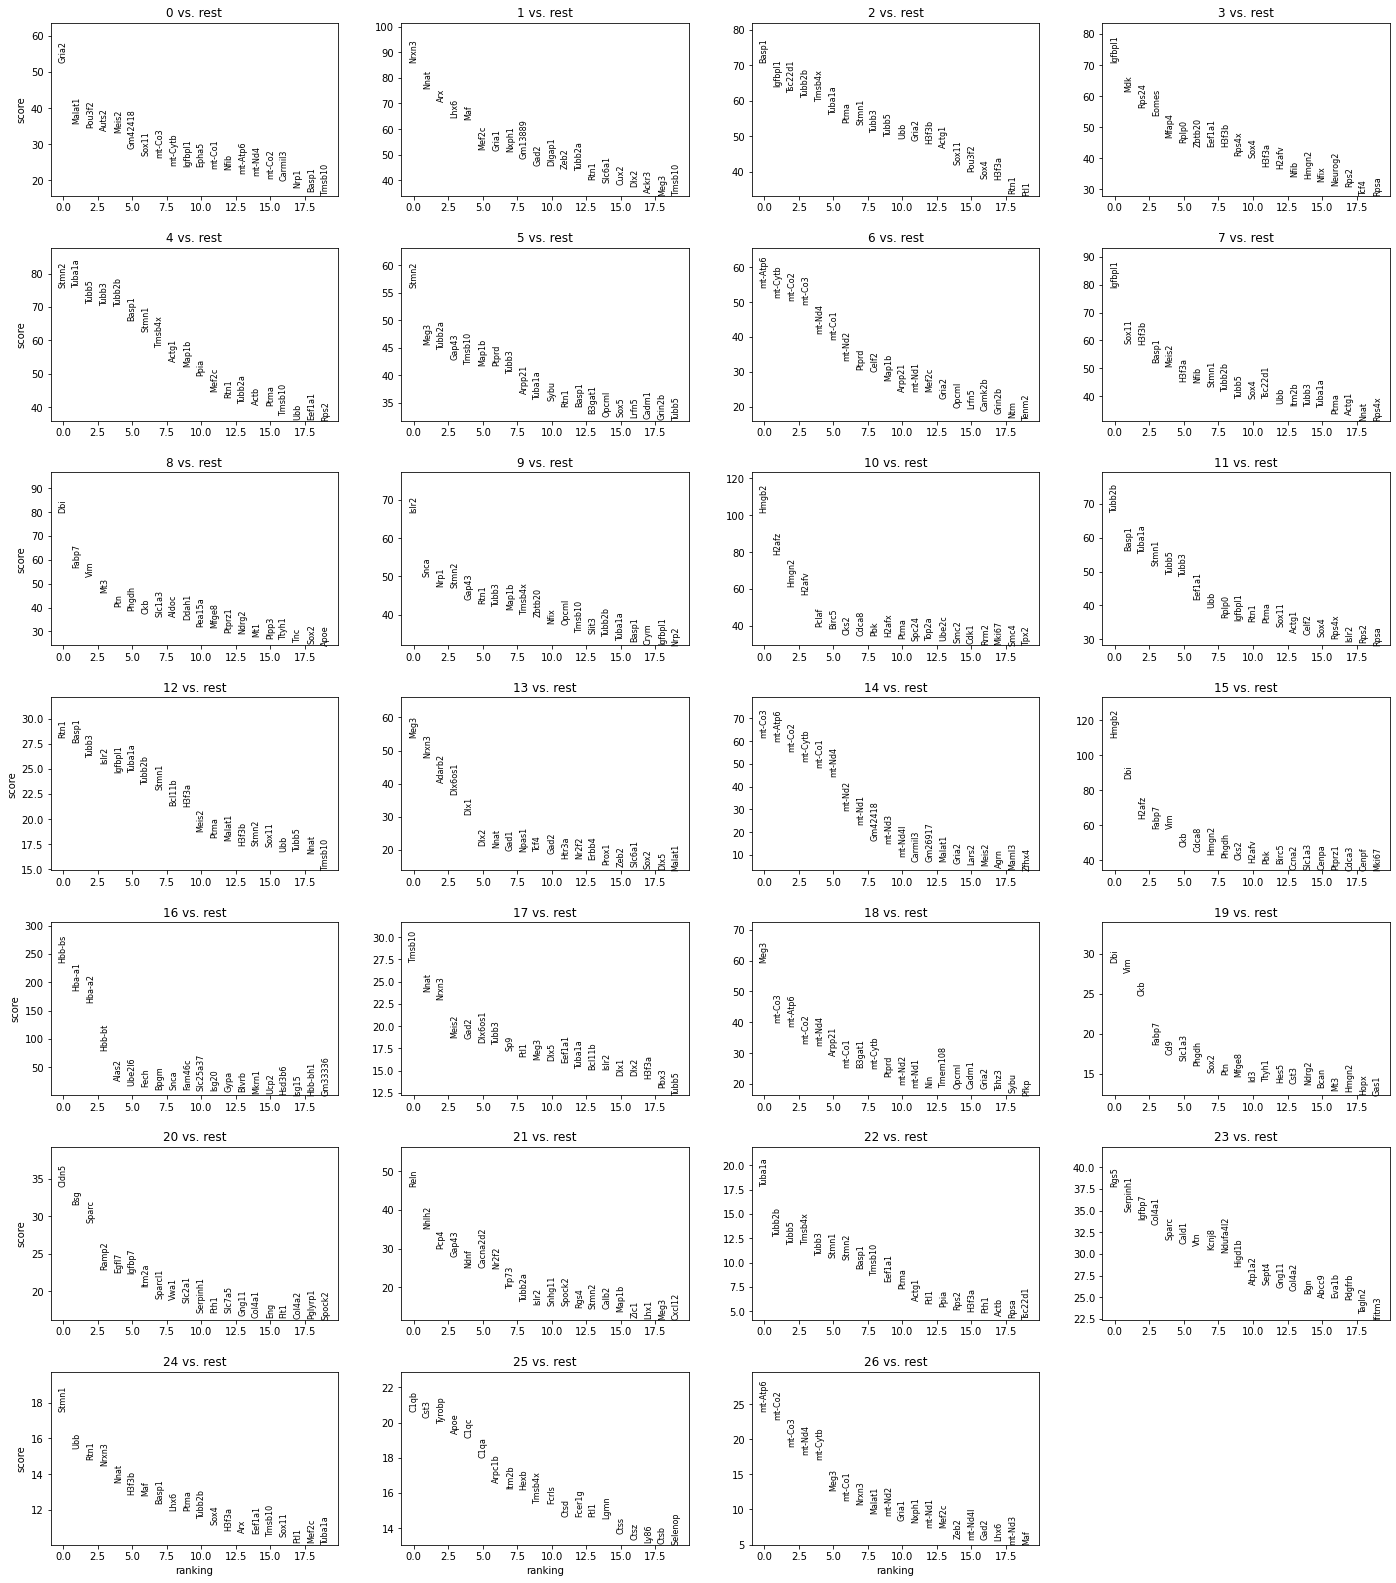

In [12]:
sc.tl.rank_genes_groups(filtered_pca, 'leiden', method = 't-test')
sc.pl.rank_genes_groups(filtered_pca, n_gene=25, sharey=False)
filtered_pca.write('t-test_genes.csv')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


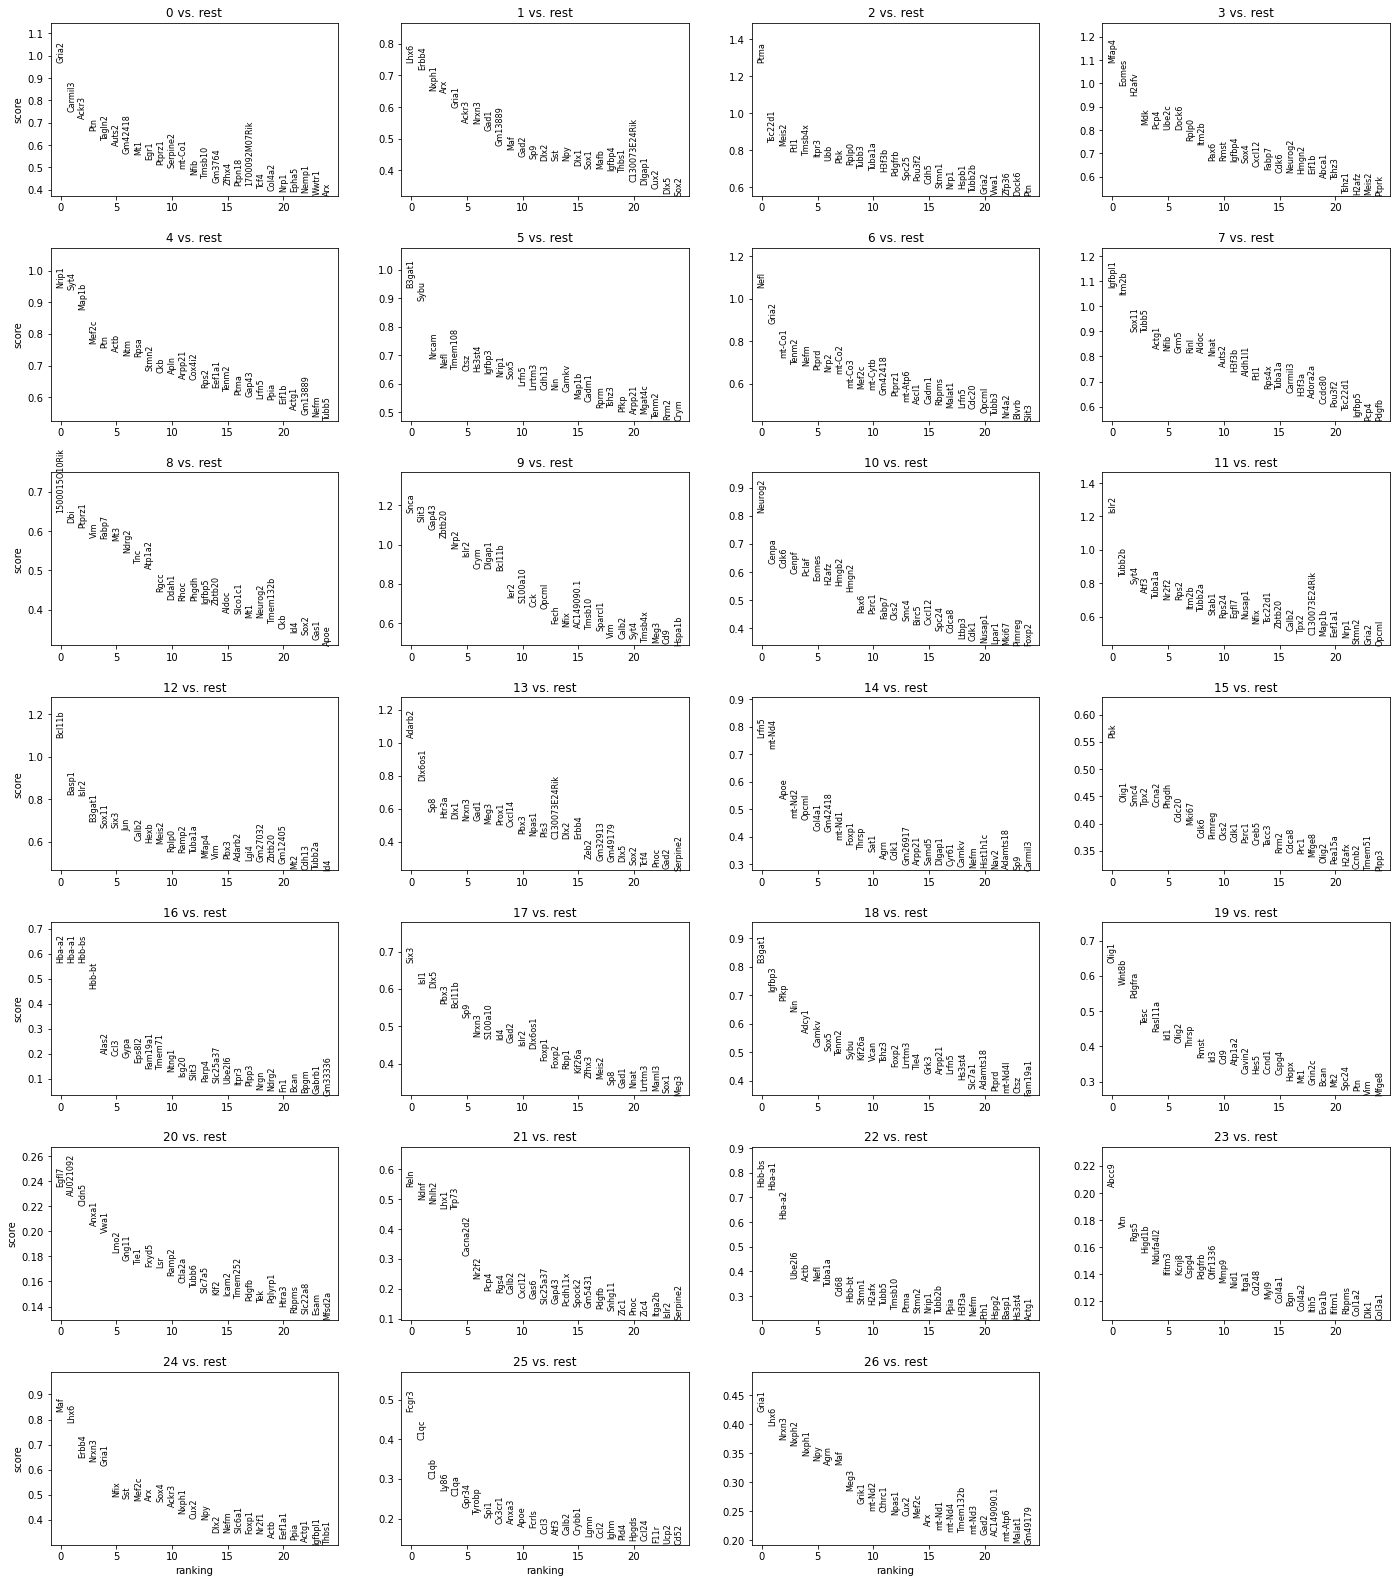

In [52]:
sc.tl.rank_genes_groups(filtered_pca, 'leiden', method='logreg')
sc.pl.rank_genes_groups(filtered_pca, n_genes=25, sharey=False)
filtered_pca.write('logreg_genes.csv')

## Testing distinct genes

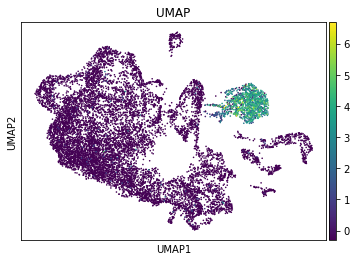

In [13]:
sc.tl.umap(filtered_pca)
sc.pl.umap(filtered_pca, color='Lhx6',use_raw=False, title='UMAP')

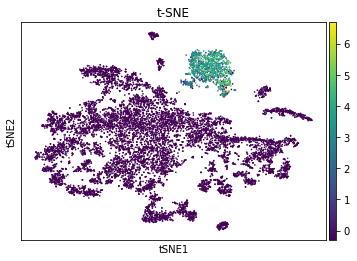

In [54]:
sc.tl.tsne(filtered_pca)
sc.pl.tsne(filtered_pca, color='Lhx6',use_raw=False, title='t-SNE')

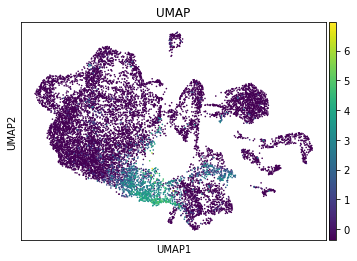

In [55]:
sc.tl.umap(filtered_pca)
sc.pl.umap(filtered_pca, color='Eomes',use_raw=False, title='UMAP')

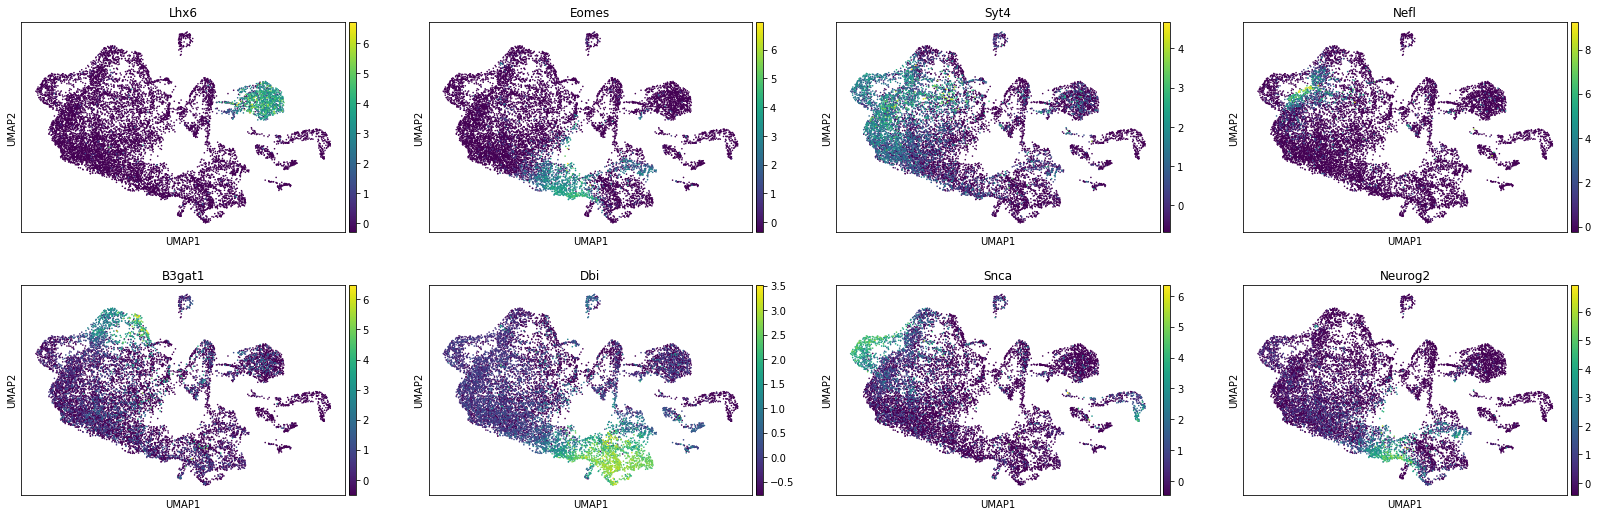

In [110]:
sc.tl.umap(filtered_pca)
sc.pl.umap(filtered_pca, color=['Lhx6', 'Eomes', 'Syt4', 'Nefl', 
                                'B3gat1', 'Dbi', 'Snca', 'Neurog2'], use_raw=False)

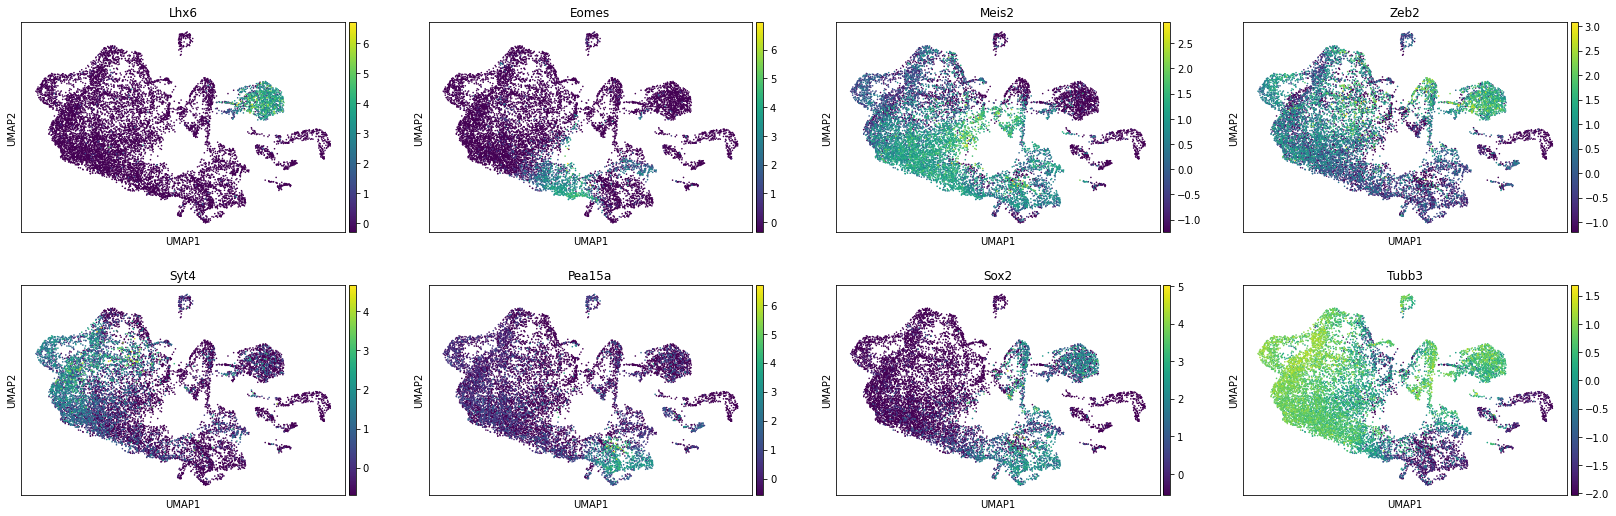

In [69]:
sc.tl.umap(filtered_pca)
sc.pl.umap(filtered_pca, color=['Lhx6', 'Eomes', 'Meis2', 'Zeb2', 
                                'Syt4', 'Pea15a', 'Sox2', 'Tubb3'], use_raw=False)

## Overall UMAP Plot

## Establishing a Marker Gene Dictionary

In [14]:
marker_gene_dict = {'GABAergic interneurons': ['Lhx6'],
                     'SVG progenitor cells': ['Eomes'],
                     'Dopaminergic periglomerular neurons': ['Meis2'],
                     'Bergmann glia': ['Zeb2'],
                     'Paraventricular nucleus cells': ['Syt4'],
                     'Astrocytes': ['Pea15a'],
                     'Radial glia': ['Sox2'],
                     'Immature neurons': ['Tubb3']}

## Generating Dotplot

categories: 0, 1, 2, etc.
var_group_labels: GABAergic interneurons, SVG progenitor cells, Dopaminergic periglomerular neurons, etc.


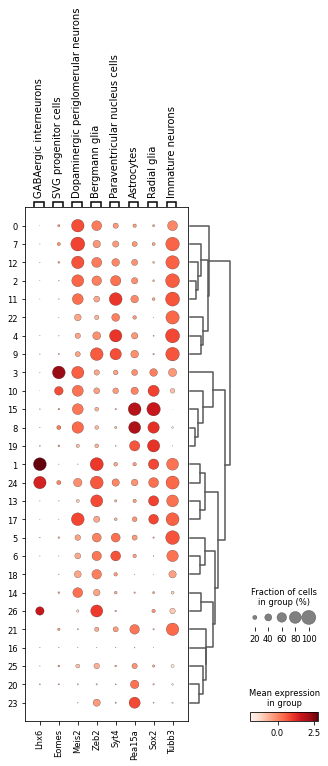

In [15]:
sc.pl.dotplot(filtered_pca, marker_gene_dict, 'leiden', dendrogram=True)

In [16]:
cluster2annotation = {
    '0': 'Dopaminergic periglomerular neurons',
    '1': 'GABAergic interneurons',
    '2': 'Immature neurons',
    '3': 'SVG progenitor cells',
    '4': 'Immature neurons',
    '5': 'Immature neurons',
    '6': 'Paraventricular nucleus cells',
    '7': 'Dopaminergic periglomerular neurons',
    '8': 'Astrocytes',
    '9': 'Immature neurons',
    '10': 'Radial glia',
    '11': 'Paraventricular nucleus cells',
    '12': 'Dopaminergic periglomerular neurons',
    '13': 'Bergmann glia',
    '14': 'Dopaminergic periglomerular neurons',
    '15': 'Astrocytes',
    '16': 'Astrocytes',
    '17': 'Dopaminergic periglomerular neurons',
    '18': 'Bergmann glia',
    '19': 'Radial glia',
    '20': 'Astrocytes',
    '21': 'Immature neurons',
    '22': 'Immature neurons',
    '23': 'Astrocytes',
    '24': 'GABAergic interneurons',
    '25': 'Astrocytes',
    '26': 'GABAergic interneurons',
}

In [17]:
filtered_pca.obs['cell type'] = filtered_pca.obs['leiden'].map(cluster2annotation).astype('category')

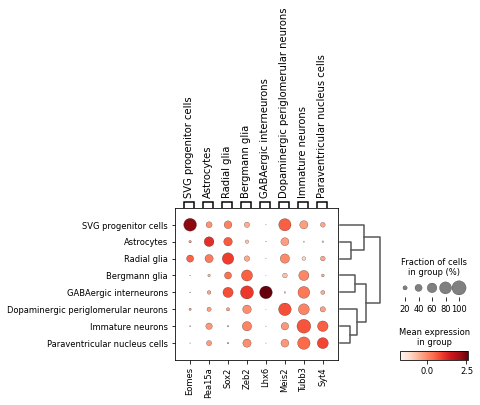

In [18]:
sc.pl.dotplot(filtered_pca, marker_gene_dict, 'cell type', dendrogram=True)

## UMAP with 8 labeled cell types

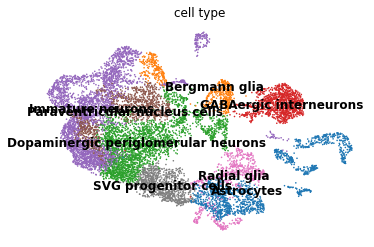

In [19]:
sc.pl.umap(filtered_pca, color='cell type', legend_loc='on data', frameon=False, legend_fontsize=12, size = 10)

## Additional Violin Plot

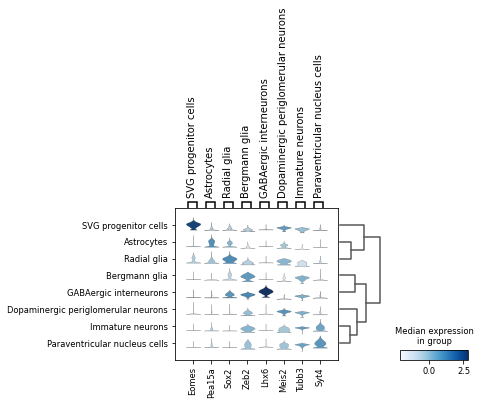

In [22]:
ax = sc.pl.stacked_violin(filtered_pca, marker_gene_dict, groupby='cell type', swap_axes=False, dendrogram=True)